# 📚 3.2相恋篇-图像编码与解码

在实际应用中，图像数据源格式多种多样，如：png\jpg\bmp等，而神经网络训练模型所需的图像的数据格式为：图像字节数据或Base64编码数据等。基于此，将png\jpg\bmp等格式的图像转换为字节数据的过程称为图像编码，将字节数据的图像转换为png\jpg\bmp等格式图像的过程称为图像解码。

## 一、本节目标
        本节将详述概述Tensorflow2中图像编码及解码的过程及实现。

## 二、 图像编码
Tensorflow图像编码的过程如下图所示，分为3个过程：转换为字节数据、转为网络安全Base64数据、标准Base64数据。接下来对这三个过程一一解析。

原始图像（png,jpg等）-> 字节数据 -> 网络安全Base64数据 -> 标准Base64数据

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598423362436501615984232492.png"/>

### 2.1 转换为字节数据
     通俗的讲，png\jpg\bmp等格式的图像转换为字节数据就是图像读取。tensorflow常用的图像读取函数为：tf.io.read_file和tf.io.gfile.

In [10]:
import tensorflow as tf
image_path = 'tf_image/219.jpg'
image_bytes = tf.io.read_file(image_path)
print('图像的字节数据{}'.format(image_bytes)[:1000])

图像的字节数据b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01w\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\

### 2.2 转为网络安全Base64编码
网络安全的base64编码数据使用“—”代替“+”，使用“—”代替“/”，以保证数据在网络传输过程中的正确性。

In [11]:
image_s64 = tf.io.encode_base64(image_bytes)
image_s64 = format(image_s64)[:1000]
print("网络安全的Base64编码：{}".format(image_s64))

网络安全的Base64编码：b'_9j_4AAQSkZJRgABAQAAAQABAAD_2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr_2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr_wAARCAF3AfQDASIAAhEBAxEB_8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL_8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4-Tl5ufo6erx8vP09fb3-Pn6_8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL_8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3-Pn6_9oADAMBAAIRAxEAPwD5i8B3jLrVguoyxWugvqIub20W3MlteMrMBCUIbA3fMHB25LcruwecuvHuh2811pOpardW1xczz3FzLPP5s9pJKAW2FlVU3FwvlAbv4WyWWojZeN9csdITV5LbTdOhtxPvaf78eUM2w5blWkQMrfviGVVU

### 4.1转为标准Base64编码：
标准的Base64数据中的“+”和“/”在网络中会被转换为“%XX”格式，而“%”在数据存储时必须进行转换。因此，标准Base64编码与网络安全的Base64编码之间的相互转换就是替换其中的不同之处即可。但是，需要注意的一点是：标准的Base64编码的数据大小是4的整数倍，不足的部分需要像卷积网络中的padding一样，用“=”补齐，已达到4的整数倍。

In [19]:
image_b64 = list(image_s64)
image_b64_lis = []
for i in range(len(image_b64)):
    if image_b64[i] == '-':
        image_b64_lis.append('+')
    elif image_b64[i] == '_':
        image_b64_lis.append('/')
    else:
        image_b64_lis.append(image_b64[i])

# 不足4倍数的使用=填充
if len(image_b64_lis) % 4 == 0:
    pass
else:
    remainder = len(image_b64_lis) % 4
    image_b64_lis.append('='*remainder)
image_b64 = "".join(image_b64_lis)
print("标准Base64编码：{}".format(image_b64)[:1000])

标准Base64编码：b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAF3AfQDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5i8B3jLrVguoyxWugvqIub20W3MlteMrMBCUIbA3fMHB25LcruwecuvHuh2811pOpardW1xczz3FzLPP5s9pJKAW2FlVU3FwvlAbv4WyWWojZeN9csdITV5LbTdOhtxPvaf78eUM2w5blWkQMrfviGVVUArU

## 四、图像解码	
Tensorflow中图像解码的过程与图像编码的格式正好相反，如图所示。

<img src="https://tianchi-public.oss-cn-hangzhou.aliyuncs.com/public/files/forum/161598428397245751615984282798.png"/>

在Tensorflow中，图像数据处理是基于图像矩阵数据进行的，因此解码过程需要将字节数据转换为矩阵数据。			


### 4.1 标准Base64解码转网络安全Base64数据

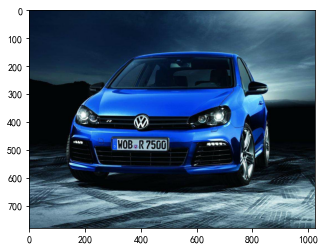

In [23]:
import tensorboard
import matplotlib.pyplot as plt
import tensorflow as tf
import base64
from tensorflow.keras import Sequential, layers, losses, optimizers, datasets
import datetime

image_path = 'tf_image/encode.jpg'
with open(image_path, 'rb') as f:
    image_data = f.read()
    # 图像文件编码为标准base64字节
    image_standard_b64_bytes = base64.b64encode(image_data)
    # 标准base64字节转换为字符串
    image_standard_b64_str = image_standard_b64_bytes.decode("utf8")
    # 标准base64字符串转为列表
    standard_b64_list = list(image_standard_b64_str)
    # 网络安全base64编码列表
    websafe_b64_list = []
    for i in range(len(standard_b64_list)):
        # /替换为_
        if standard_b64_list[i] == "/":
            websafe_b64_list.append("_")
        # +替换为-
        elif standard_b64_list[i] == "+":
            websafe_b64_list.append("-")
        # 剔除=
        elif standard_b64_list[i] == "=":
            break
        else:
            websafe_b64_list.append(standard_b64_list[i])
    # 网络安全base64列表转为字符串
    websafe_b64_str = "".join(websafe_b64_list)
web_b64_tensor = tf.convert_to_tensor(websafe_b64_str)
web_b64_decode = tf.io.decode_base64(web_b64_tensor)
image_matrix = tf.io.decode_image(web_b64_decode)
plt.imshow(image_matrix)
plt.show()

### 4.3网络安全的Base64编码解码

In [38]:
image_path = 'tf_image/encode.jpg'
# 图像读取
image_bytes = tf.io.read_file(image_path) # 字节
image_b64 = tf.io.encode_base64(image_bytes) # 网络安全base64
image_b64 = tf.io.decode_base64(image_b64)
# image_matrix = tf.io.decode_image(image_b64)
# plt.imshow(image_matrix)
# plt.show()

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xfe\x00>CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), default quality\n\xff\xdb\x00C\x00\r\t\n\x0b\n\x08\r\x0b\n\x0b\x0e\x0e\r\x0f\x13 \x15\x13\x12\x12\x13\'\x1c\x1e\x17 .)10.)-,3:J>36F7,-@WAFLNRSR2>ZaZP`JQRO\xff\xdb\x00C\x01\x0e\x0e\x0e\x13\x11\x13&\x15\x15&O5-5OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO\xff\xc0\x00\x11\x08\x03\x0c\x04\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\xff\xc4\x00T\x10\x00\x01\x04\x01\x01\x05\x05\x06\x03\x04\x08\x03\x05\x06\x02\x0b\x01\x00\x02\x03\x11\x04!\x05\x121AQ\x13aq\x81\x91\x06\x14"\xa1\xb1\xd12R\xc1\x15#B\x92\x073CSb\x82\xe1\xf0$r\xf1\x164c\x83\x935DT\xa2\xb2\xc2\xd2%Us\x84\xc3\x17&\'Ed\xa3\xb3\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xc4\x00,\x11\x01\x01\x00\x02\x01\x04\x03\x00\x01\

TypeError: Cannot iterate over a scalar tensor.